In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set_theme(style="whitegrid")

# There is no need of ColumnTransformer or OneHotEncoder since there is no categorical data.

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
# data cleaning

df = pd.read_csv("Advertising.csv.xls")
 
print("Shape: ", df.shape)
print(df.head())
# print(df.info())
# print(df.isna().sum())
# print(df.duplicated().sum())
print(df.columns.tolist())
df = df.rename(columns={'Unnamed: 0' : 'Sr_no'})
print(df.columns.tolist())

Shape:  (200, 5)
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']
['Sr_no', 'TV', 'Radio', 'Newspaper', 'Sales']


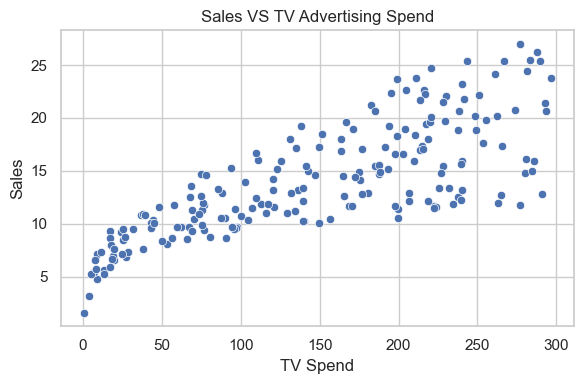

In [3]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title('Sales VS TV Advertising Spend')
plt.xlabel('TV Spend')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# This scatterplot shows that when the Advertising is spend on TV it brings the most returns, i.e. Sales are the most.
# The other mediums give good results even in low-spend, but TV results in less returns on low-spend.

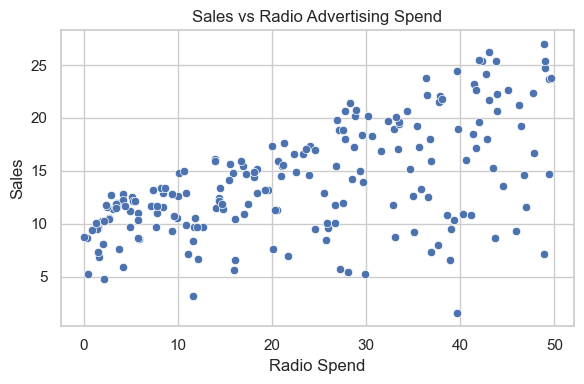

In [4]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.title('Sales vs Radio Advertising Spend')
plt.xlabel('Radio Spend')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

#But compatively if less money is spend on Radio Advertisement and still it results in the approximately the same amount of Sales.

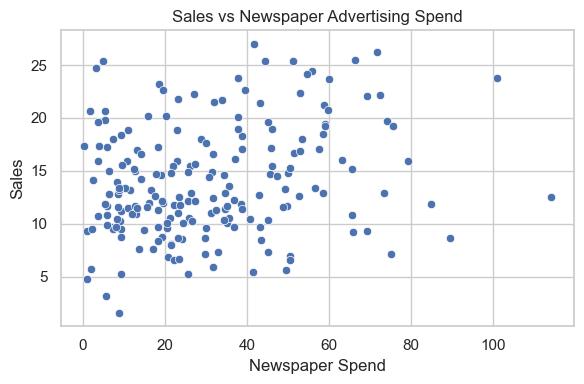

In [5]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Newspaper', y='Sales')
plt.title('Sales vs Newspaper Advertising Spend')
plt.xlabel('Newspaper Spend')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

#  Newspaper results in pretty good sales even with low investment. Out of the three mediums, least money is spend on Newspaper but still it returns the most amount of Sales.
# Newspaper advertising spending is the most profitable, follow by Radio and then TV.

In [6]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df[['Sales']]

print(f"\nFeatures Shape: {x.shape}")
print(f"\ntarget Shape: {y.shape}")


Features Shape: (200, 3)

target Shape: (200, 1)


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print(f"Train: {x_train.shape}, Test: {x_test.shape}")

Train: (160, 3), Test: (40, 3)


In [8]:
rf_pipe = Pipeline(
    [
        (
            'Scaler', StandardScaler()
        ),
        (
            'model', RandomForestRegressor(n_estimators=200, random_state=42)
        )
    ]
)

lr_pipe = Pipeline(
    [
        (
            'scaler', StandardScaler()
        ),
        (
            'model', LinearRegression()
        )
    ]
)

rf_pipe.fit(x_train, y_train)
lr_pipe.fit(x_train, y_train)

print("Model Trained")


Model Trained


/Users/mayanksaini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [9]:
rf_pred = rf_pipe.predict(x_test)
lr_pred = lr_pipe.predict(x_test)

print("RandomForestRegressor Results: ")
print(f"    R2 Score: {r2_score(y_test, rf_pred): .3f}")
print(f"    RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.3f}")

print("\nLinearRegression Results: ")
print(f"    R2 Score: {r2_score(y_test, rf_pred): .3f}")
print(f"    RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.3f}")

RandomForestRegressor Results: 
    R2 Score:  0.982
    RMSE: 0.757

LinearRegression Results: 
    R2 Score:  0.982
    RMSE: 0.757


     Channel  Sales_per_Dollar
0         TV          3.764196
1      Radio          2.792307
2  Newspaper          0.055976


/var/folders/cr/qcmwvlds3sj2mq_y233smrfr0000gn/T/ipykernel_5772/3409694673.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


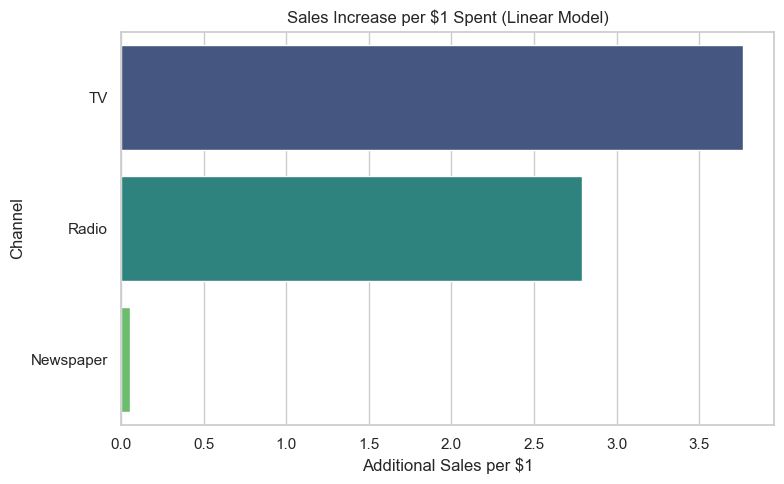

In [ ]:
# Make coefficients 1‑D
coefs = pd.DataFrame({
    'Channel': ['TV', 'Radio', 'Newspaper'],
    'Sales_per_Dollar': lr_pipe.named_steps['model'].coef_.ravel()
}).sort_values('Sales_per_Dollar', ascending=False)

print(coefs)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=coefs,
    x='Sales_per_Dollar',
    y='Channel',
    palette='viridis'
)
plt.title('Sales Increase per $1 Spent (Linear Model)')
plt.xlabel('Additional Sales per $1')
plt.tight_layout()
plt.show()


In [ ]:
total_budget = 300

# Use linear model coefficients as weights
coef_vals = lr_pipe.named_steps['model'].coef_.ravel()
channels = ['TV', 'Radio', 'Newspaper']

weights = coef_vals / coef_vals.sum()
allocation = total_budget * weights


alloc_df = pd.DataFrame({'Channel': channels, 'Budget': allocation})
print("Recommended allocation for budget =", total_budget)
print(alloc_df)

# Predicted sales for that allocation
recommended_sales = lr_pipe.predict([allocation])[0]
print("\nPredicted sales with this allocation: ", recommended_sales)


Recommended allocation for budget = 300
     Channel      Budget
0         TV  170.776945
1      Radio  126.683514
2  Newspaper    2.539540

Predicted sales with this allocation:  [34.59274404]


/Users/mayanksaini/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
